<a href="https://colab.research.google.com/github/KostaKat/MAT442/blob/main/hw2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Joint Probability Distributions

In probability theory, it's common to deal with multiple random variables that may be correlated. For example, consider how fast a deep learning model is trained. This speed is influenced by hardware factors such as the GPU's memory and the number of CUDA cores, as well as model settings like batch size and dropout rate (hyperparameters). These variables collectively determine the model's training speed and performance. Consequently, they form a joint probability distribution, representing the combined probability of different configurations and their impact on training speed.


### Discrete Random Variables
For two discrete random variables, $ X$  and $ Y$ , the **joint probability mass function (pmf)** is given by:
$$
p(x, y) = P(X = x, Y = y)
$$
This function provides the probability that $ X$  takes on the value $ x$  and $ Y$  takes on the value $ y$ .

The concept can be generalized for $ n$  discrete random variables $ X_1, X_2, \ldots, X_n$ , where the joint pmf is:
$$
p(x_1, x_2, \ldots, x_n) = P(X_1 = x_1, X_2 = x_2, \ldots, X_n = x_n)
$$
This joint pmf describes the probability of each combination of values $ (x_1, x_2, \ldots, x_n)$  occurring simultaneously.


### Continuous Random Variables
For two continuous random variables, $ X $ and $ Y $, the probability that $ X $ and $ Y$  fall in the ranges $ [a, b]$  and $ [c, d]$ , respectively, is given by the **joint probability density function (pdf)**:
$$
P(a \leq X \leq b, \, c \leq Y \leq d) = \int_a^b \int_c^d f(x, y) \, dy \, dx
$$
This calculates the probability that the values of $ X$  and $ Y$  fall within their respective intervals $ [a, b]$  and $ [c, d]$ .

The concept can be generalized to $ n$  continuous random variables $ X_1, X_2, \ldots, X_n$ , each within their respective intervals $ [a_1, b_1], [a_2, b_2], \ldots, [a_n, b_n]$ . The probability that the variables fall within these intervals is given by the joint pdf:
$$
P(a_1 \leq X_1 \leq b_1, \ldots, a_n \leq X_n \leq b_n) = \int_{a_1}^{b_1} \cdots \int_{a_n}^{b_n} f(x_1, \ldots, x_n) \, dx_n \cdots dx_1
$$
This joint pdf captures the density of probabilities for any combination of values of the $ n$  variables that fall within their respective intervals.



Further elaborating on our joint distribution example, what if we wanted to examine how each variable affects training speed independently of the other? We can do this by taking the **marginal probabilities** or **marginal densities** of each random variable in correspondence with the joint distribution.

### Marginal probabilities and Densities
#### Discrete Random Variables
For discrete random variables $ X $ and $ Y $, the marginal probabilities are defined as follows:

The marginal probability mass function of $ X $, is obtained by summing over all possible values of $ Y $:
$$
p_X(x) = \sum_{y:p(x, y) \gt 0} p(x, y) \quad \text{for each possible value of } x
$$

Similarly, the marginal probability mass function of $ Y $, is obtained by summing over all possible values of $ X $:
$$
p_Y(y) = \sum_{x:p(x, y) \gt 0} p(x, y) \quad \text{for each possible value of } y
$$


#### Continuous Random Variables
For continuous random variables $ X $ and  $ Y $, the marginal densities are defined as follows:

- The marginal density of $ X $, is calculated by integrating out all possible values of $ Y $:
$$
f_X(x) = \int_{-\infty}^{\infty} f(x, y) \, dy \quad \text{for all } x \in \mathbb{R}
$$

Similarly, the marginal density of $ Y $, calculated by integrating out all possible values of $ Y $
$$
f_Y(y) = \int_{-\infty}^{\infty} f(x, y) \, dx \quad \text{for all } y \in \mathbb{R}
$$


Additionally, it is important to determine whether random variables in the joint probability distribution interact independently of each other or if they exhibit a dependency. For example, it is easy to see that **batch size** may depend on the amount of **GPU memory** available. However, are the number of **epochs** independent of the number of **CUDA cores** a GPU has?

### Independence

#### Two Discrete Random Variables
Two discrete random variables, $ X $ and $ Y $ , are **independent** if :
$$
p(x, y) = p_X(x) \cdot p_Y(y) \quad \text{for all } x \text{ and } y
$$


#### Two Continuous Random Variables
Similarly, for two continuous random variables, $ X$  and $ Y$ , they are independent if :
$$
f(x, y) = f_X(x) \cdot f_Y(y) \quad \text{for all } x \text{ and } y
$$



### Generalization to Multiple Variables
The concept of independence can be extended to $ n$  random variables, $ X_1, X_2, \ldots, X_n$ . They are **independent** if for any subset $ \{X_{i_1}, X_{i_2}, \ldots, X_{i_k}\}$ , the joint pmf or pdf of the subset equals the product of their marginals.

Furthermore, it is important to note that if this condition is not satisfied for both continuous and discrete random variables, the variables are dependent.

In [ ]:
import numpy as np

# Create the joint pmf
joint_pmf = {
    (0, 0): 0.1,
    (0, 1): 0.2,
    (1, 0): 0.3,
    (1, 1): 0.4
}

# Compute the marginal pmf of X
marginal_pmf_X = {}
for x in [0, 1]:
    marginal_pmf_X[x] = sum(joint_pmf[(x, y)] for y in [0, 1])

print("Marginal PMF of X:")
for x in marginal_pmf_X:
    print(f"P(X={x}) = {marginal_pmf_X[x]}")

# Compute the marginal pmf of Y
marginal_pmf_Y = {}
for y in [0, 1]:
    marginal_pmf_Y[y] = sum(joint_pmf[(x, y)] for x in [0, 1])

print("\nMarginal PMF of Y:")
for y in marginal_pmf_Y:
    print(f"P(Y={y}) = {marginal_pmf_Y[y]}")

# Check for independence: p(x, y) == p_X(x) * p_Y(y)
independent = True
for x in [0, 1]:
    for y in [0, 1]:
        p_xy = joint_pmf[(x, y)]
        p_x = marginal_pmf_X[x]
        p_y = marginal_pmf_Y[y]
        product = p_x * p_y
        if not np.isclose(p_xy, product):
            print(f"\nAt (X={x}, Y={y}):")
            print(f"P(X={x}, Y={y}) = {p_xy}")
            print(f"P(X={x}) * P(Y={y}) = {product}")
            print("=> Not equal, variables are dependent.")
            independent = False
            break  # Break out of the inner loop
    if not independent:
        break  # Break out of the outer loop

if independent:
    print("\nX and Y are independent.")
else:
    print("\nX and Y are dependent.")


Marginal PMF of X:
P(X=0) = 0.30000000000000004
P(X=1) = 0.7

Marginal PMF of Y:
P(Y=0) = 0.4
P(Y=1) = 0.6000000000000001

At (X=0, Y=0):
P(X=0, Y=0) = 0.1
P(X=0) * P(Y=0) = 0.12000000000000002
=> Not equal, variables are dependent.

X and Y are dependent.



## Correlation and Dependence
However, let's say that we have two random variables that are dependent and would like to measure the strength of their relationship. In probability theory, this is measure by their corelation. The correlation for two random variables $X $ and $Y$ are mathematically denoted as follows:
### Correlation Coefficient
The **covariance** of two random variables $ X$  and $ Y$  is :
$$
\text{Cov}(X, Y) = E[(X - \mu_X)(Y - \mu_Y)]
$$
where $ \mu_X$  and $ \mu_Y$  are the means of $ X$  and $ Y$ , respectively.

- If $ X$  and $ Y$  are **discrete**, the covariance is:
$$
\text{Cov}(X, Y) = \sum_x \sum_y (x - \mu_X)(y - \mu_Y) p(x, y)
$$
- If $ X$  and $ Y$  are **continuous**, the covariance is:
$$
\text{Cov}(X, Y) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} (x - \mu_X)(y - \mu_Y) f(x, y) \, dx \, dy
$$

**Properties**
1. Positive covariance: The data points show an upward trend.
2. Negative covariance: The data points show a downward trend.
3. Covariance near zero: The data points are scattered without a clear trend.

The **correlation coefficient**, denoted as $ \rho_{X,Y}$ , normalizes the covariance by the product of the standard deviations of $ X$  and $ Y$. This quantifies their linear correlation:
$$
\rho_{X,Y} = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}
$$
where $ \sigma_X$  and $ \sigma_Y$  are the standard deviations of $ X$  and $ Y$ , respectively.

**Properties**:
1. If $ X$  and $ Y$  are independent, then $ \rho = 0$ . However, $ \rho = 0$  does not imply independence.
2. $ |\rho| \leq 1$ . Specifically, $ \rho = 1$  or $ \rho = -1$  if $ Y = aX + b$  for some constants $ a$  and $ b$ , where $ a \neq 0$ .


### Correlation for Samples
For a sample of $ n$  pairs $ (x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)$ , the **sample correlation coefficient**, $ r_{xy}$ , estimates the population correlation coefficient:
$$
r_{xy} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}}
$$
where $ \bar{x}$  and $ \bar{y}$  are the sample means of $ x$  and $ y$ .

Alternatively, using the **sample covariance** $ s_{xy}$  and **sample standard deviations** $ s_x$  and $ s_y$ :
$$
r_{xy} = \frac{s_{xy}}{s_x s_y}
$$
where
$$
s_{xy} = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})
$$
$$
s_x = \sqrt{\frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2}
$$

Properties of $ r_{xy}$:
1. If $ y = ax + b$ , then $ r_{xy} = 1$  or $ -1$  depending on the sign of $ a$ .
2. $ 0 < r < 1$ : Shows a moderate positive correlation with a general upward trend.
3. $ -1 < r < 0$ : Shows a moderate negative correlation with a downward trend.
4. $ r = 0$ : Indicates no correlation, with data points scattered randomly.
5. $ r = 1$  and $ r = -1$ : Demonstrate positive and negative correlations, where all data points lie exactly on a straight line.


In [ ]:
# Example of computing covariance and correlation coefficient

import numpy as np

# Discrete Random Variables Example
# Let's suppose X and Y represent the outcomes of rolling two fair dice

# Possible values: 1 through 6
X = np.array([1, 2, 3, 4, 5, 6])
Y = np.array([1, 2, 3, 4, 5, 6])

# Joint pmf assuming independence
joint_pmf = {(x, y): 1/36 for x in X for y in Y}

# Compute expected values E[X], E[Y]
E_X = sum(x * sum(joint_pmf[(x, y)] for y in Y) for x in X)
E_Y = sum(y * sum(joint_pmf[(x, y)] for x in X) for y in Y)

# Compute variances Var[X], Var[Y]
Var_X = sum((x - E_X)**2 * sum(joint_pmf[(x, y)] for y in Y) for x in X)
Var_Y = sum((y - E_Y)**2 * sum(joint_pmf[(x, y)] for x in X) for y in Y)

# Compute covariance Cov[X, Y]
Cov_XY = sum((x - E_X)*(y - E_Y)*joint_pmf[(x, y)] for x in X for y in Y)

# Compute correlation coefficient
rho_XY = Cov_XY / (np.sqrt(Var_X) * np.sqrt(Var_Y))

print("Discrete Variables Example:")
print("E[X] =", E_X)
print("E[Y] =", E_Y)
print("Var[X] =", Var_X)
print("Var[Y] =", Var_Y)
print("Cov[X, Y] =", Cov_XY)
print("Correlation coefficient rho =", rho_XY)

# Continuous Random Variables Example
# Let's suppose X and Y are normally distributed with correlation 0.6

from scipy.stats import multivariate_normal

mean = [0, 0]
cov = [[1, 0.6], [0.6, 1]]  # Covariance matrix with covariance 0.6

# Generate 1000 samples
data = multivariate_normal.rvs(mean=mean, cov=cov, size=1000)
X_cont = data[:, 0]
Y_cont = data[:, 1]

# Compute sample means
E_X_cont = np.mean(X_cont)
E_Y_cont = np.mean(Y_cont)

# Compute sample variances
Var_X_cont = np.var(X_cont, ddof=1)
Var_Y_cont = np.var(Y_cont, ddof=1)

# Compute sample covariance
Cov_XY_cont = np.cov(X_cont, Y_cont, ddof=1)[0, 1]

# Compute sample correlation coefficient
rho_XY_cont = Cov_XY_cont / (np.sqrt(Var_X_cont) * np.sqrt(Var_Y_cont))

print("\nContinuous Variables Example:")
print("Sample E[X] =", E_X_cont)
print("Sample E[Y] =", E_Y_cont)
print("Sample Var[X] =", Var_X_cont)
print("Sample Var[Y] =", Var_Y_cont)
print("Sample Cov[X, Y] =", Cov_XY_cont)
print("Sample Correlation coefficient rho =", rho_XY_cont)


Discrete Variables Example:
E[X] = 3.5
E[Y] = 3.5
Var[X] = 2.9166666666666665
Var[Y] = 2.9166666666666665
Cov[X, Y] = 2.7755575615628914e-17
Correlation coefficient rho = 9.516197353929913e-18

Continuous Variables Example:
Sample E[X] = -0.02700984700383544
Sample E[Y] = -0.004918261285030258
Sample Var[X] = 0.9742836940204339
Sample Var[Y] = 0.9493974868773098
Sample Cov[X, Y] = 0.5579272516276105
Sample Correlation coefficient rho = 0.5801106236675948


### Random Samples

In probability theory, a random sample is a subset of a population that is randomly selected. This is particularly useful in practical applications like machine learning, where datasets are often large and diverse, making it hard to analyze the entire population. For example, if a machine learning scientist wants to test their model architecture before training it on a large dataset like ImageNet, they can take random samples that represent the dataset before training on the whole dataset. However, to be considered a valid random sample, the data must meet the following properties:
Random variables $X_1, X_2, \ldots, X_n $ form a random sample of size n if:
1. The random variables $ X_i $ are **independent** of each other
2. Each random variable $ X_i $ has the **same probability distribution**

However, it is important to note that in applications like machine learning, this is often assumed, even if the data does not strictly behave as such. While this may seem incorrect, outcomes have shown that this strategy is effective.

Nevertheless, we can use the properties of a random samples to estimates a population mean of a dataset, by using the sample mean denoted as: $
\bar{X} = \frac{1}{n}(X_1 + X_2 + \cdots + X_n)
$

### Properties of the Sample
The sample mean $ bar{X} $ allows us to estimate the **population mean** $ \mu $. The relationships between the sample mean and the population parameters are as follows:
1. The **expectation** of the sample mean is equal to the population mean:
   $$
   E(\bar{X}) = \mu
   $$
   
2. The **variance** of the sample mean is related to the **population variance** $ \sigma^2 $ and the **sample size** $ n $:
   $$
   V(\bar{X}) = \frac{\sigma^2}{n}, \quad \sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}}
   $$

   This means that as the sample size $ n $ increases, the estimate of $ \bar{X} $ becomes better


### Sample Total
The **sample total** $ T_0 $ is the sum of all observations in a sample:
$$
T_0 = X_1 + X_2 + \cdots + X_n
$$
The properties of $ T_0$  are:
- The **expectation** of $ T_0$ :
  $$
  E(T_0) = n\mu
  $$
- The **variance** of $ T_0$ :
  $$
  V(T_0) = n\sigma^2
  $$
- The **standard deviation** of $ T_0$ :
  $$
  \sigma_{T_0} = \sigma \sqrt{n}
  $$

The sample total $ T_0 $ measures the behavior of all observations within a sample. Its significance in the context of the **Central Limit Theorem (CLT)**: as the sample size $ n $ increases, both the distribution of the sample mean $ \bar{X} $ and the sample total $ T_0 $ approach a **normal distribution**, regardless of the original distribution of the data.

If $ X_1, X_2, \ldots, X_n $ is a random sample from a distribution with mean $ \mu$ and variance $ \sigma^2$, then as $ n$  becomes large:

The sample mean $ \bar{X}$ approximately follows a normal distribution with:
  $$
  \mu_{\bar{X}} = \mu, \quad \sigma_{\bar{X}}^2 = \frac{\sigma^2}{n}
  $$

The sample total $ T_0$  approximately follows a normal distribution with:
  $$
  \mu_{T_0} = n\mu, \quad \sigma_{T_0}^2 = n\sigma^2
  $$



Sample size n=5:
  Mean of sample means = 49.9661
  Variance of sample means = 44.8279
  Theoretical variance of sample mean = 45.0000
  Mean of sample variances = 222.1007
  Population variance σ² = 225

Sample size n=10:
  Mean of sample means = 49.7993
  Variance of sample means = 22.5295
  Theoretical variance of sample mean = 22.5000
  Mean of sample variances = 214.8488
  Population variance σ² = 225

Sample size n=30:
  Mean of sample means = 50.1059
  Variance of sample means = 7.0014
  Theoretical variance of sample mean = 7.5000
  Mean of sample variances = 224.1959
  Population variance σ² = 225

Sample size n=50:
  Mean of sample means = 49.9161
  Variance of sample means = 4.9293
  Theoretical variance of sample mean = 4.5000
  Mean of sample variances = 226.3485
  Population variance σ² = 225

Sample size n=100:
  Mean of sample means = 49.9759
  Variance of sample means = 2.2140
  Theoretical variance of sample mean = 2.2500
  Mean of sample variances = 225.7976
  Popula

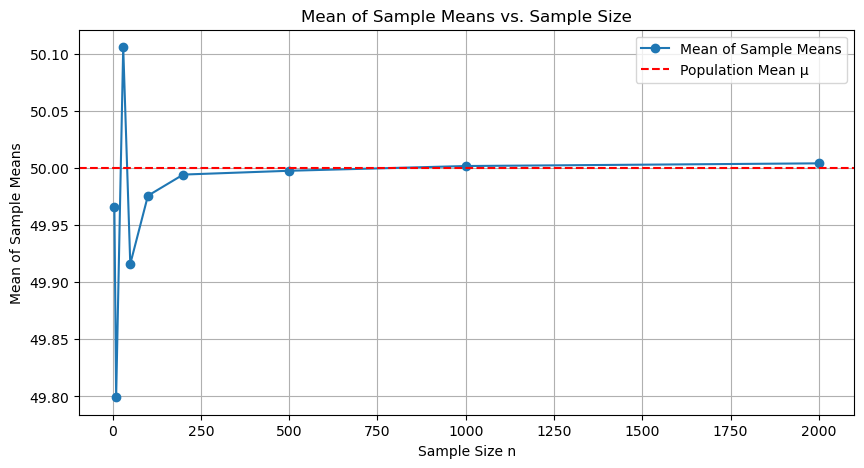

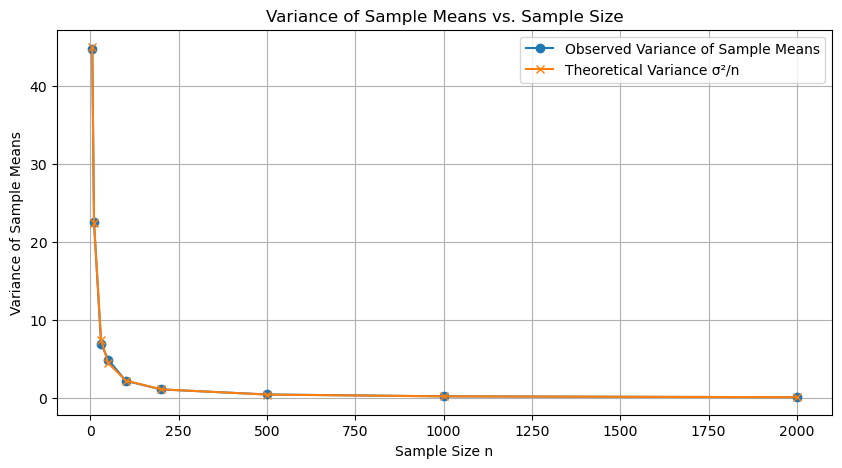

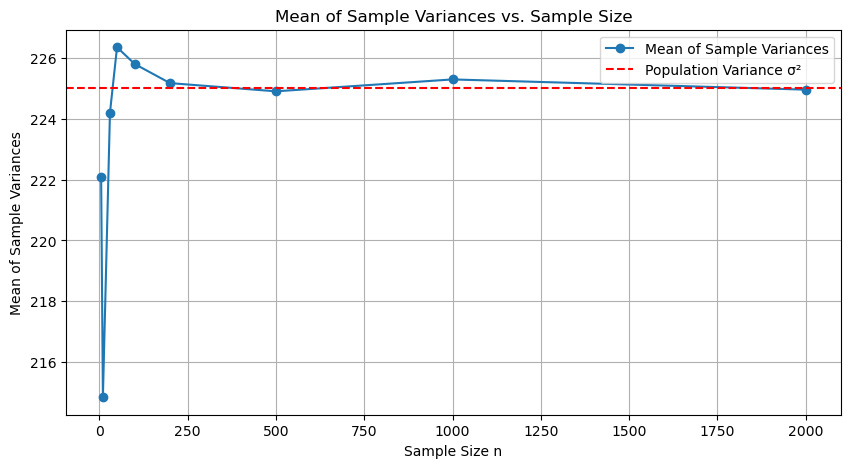

In [ ]:
# Example of Random Samples and Sample Mean Properties

import numpy as np
import matplotlib.pyplot as plt

# Population parameters
mu = 50        # Population mean
sigma = 15     # Population standard deviation

# Sample sizes to test
sample_sizes = [5, 10, 30, 50, 100, 200, 500, 1000, 2000]

# Number of repetitions for each sample size
num_repetitions = 1000

# Lists to store results
mean_of_sample_means = []
variance_of_sample_means = []
mean_of_sample_variances = []
theoretical_variances = []

for n in sample_sizes:
    # Lists to store sample means and variances for each repetition
    sample_means_rep = []
    sample_variances_rep = []

    for _ in range(num_repetitions):
        # Generate a random sample of size n from a normal distribution
        sample = np.random.normal(mu, sigma, n)
        # Compute sample mean and variance
        sample_mean = np.mean(sample)
        sample_variance = np.var(sample, ddof=1)  # Unbiased estimator with ddof=1

        sample_means_rep.append(sample_mean)
        sample_variances_rep.append(sample_variance)

    # Compute the mean of the sample means (should be close to mu)
    mean_sample_mean = np.mean(sample_means_rep)
    mean_of_sample_means.append(mean_sample_mean)

    # Compute the variance of the sample means (should be close to sigma^2 / n)
    variance_sample_mean = np.var(sample_means_rep, ddof=1)
    variance_of_sample_means.append(variance_sample_mean)

    # Compute the mean of the sample variances (should be close to sigma^2)
    mean_sample_variance = np.mean(sample_variances_rep)
    mean_of_sample_variances.append(mean_sample_variance)

    # Theoretical variance of the sample mean
    theoretical_variance = sigma**2 / n
    theoretical_variances.append(theoretical_variance)

    # Print results for each sample size
    print(f"Sample size n={n}:")
    print(f"  Mean of sample means = {mean_sample_mean:.4f}")
    print(f"  Variance of sample means = {variance_sample_mean:.4f}")
    print(f"  Theoretical variance of sample mean = {theoretical_variance:.4f}")
    print(f"  Mean of sample variances = {mean_sample_variance:.4f}")
    print(f"  Population variance σ² = {sigma**2}\n")

# Plotting mean of sample means vs. sample size to show convergence to population mean
plt.figure(figsize=(10, 5))
plt.plot(sample_sizes, mean_of_sample_means, marker='o', label='Mean of Sample Means')
plt.axhline(y=mu, color='r', linestyle='--', label='Population Mean μ')
plt.title('Mean of Sample Means vs. Sample Size')
plt.xlabel('Sample Size n')
plt.ylabel('Mean of Sample Means')
plt.legend()
plt.grid(True)
plt.show()

# Plotting variance of sample means vs. sample size
plt.figure(figsize=(10, 5))
plt.plot(sample_sizes, variance_of_sample_means, marker='o', label='Observed Variance of Sample Means')
plt.plot(sample_sizes, theoretical_variances, marker='x', label='Theoretical Variance σ²/n')
plt.title('Variance of Sample Means vs. Sample Size')
plt.xlabel('Sample Size n')
plt.ylabel('Variance of Sample Means')
plt.legend()
plt.grid(True)
plt.show()

# Plotting mean of sample variances vs. sample size to show estimation of population variance
plt.figure(figsize=(10, 5))
plt.plot(sample_sizes, mean_of_sample_variances, marker='o', label='Mean of Sample Variances')
plt.axhline(y=sigma**2, color='r', linestyle='--', label='Population Variance σ²')
plt.title('Mean of Sample Variances vs. Sample Size')
plt.xlabel('Sample Size n')
plt.ylabel('Mean of Sample Variances')
plt.legend()
plt.grid(True)
plt.show()
